# Chapter 07 문서 업무 자동화

### [실습] 유통매장의 고객만족도 분석하기

In [1]:
# 01. 엑셀 파일 불러오기
from openpyxl import load_workbook            #  Workbook 모듈과 load_workbook 불러오기
wb = load_workbook("./file/고객 만족 데이터.xlsx")    # 파일을 불러와 wb 객체로 저장
ws = wb["Sheet1"]                              # 시트 선택

In [2]:
# 고객 만족 데이터.xlsx 표현
import pandas as pd

pd.DataFrame(ws.values, columns=["A", "B", "C", "D", "E", "F", "G", "H"],
            index = [i for i in range(1,15)])

,A,B,C,D,E,F,G,H
1,No.,제품 만족도,재구매 의사,추천 의향,방문 횟수,클레임 횟수,연령대,성별
2,1,5,4,4,0,4,30대,남
3,2,5,4,4,0,4,20대,남
4,3,5,5,5,0,3,30대,여
5,4,5,5,5,2,3,20대,남
6,5,5,4,4,2,5,30대,여
7,6,5,4,4,0,0,30대,여
8,7,5,5,5,0,2,20대,남
9,8,5,4,4,1,1,30대,남
10,9,5,5,5,2,2,20대,남


In [3]:
# 02. 데이터 변환하기  - 반복문을 활용해 [A2:F14] 범위의 설문 응답 데이터만 숫자 형식으로 변경
for row in ws:                          # ws의 행을 하나씩 읽어 옴
    for cell in row:                    # 행의 각 셀에 접근
        if cell.col_idx > 0 and cell.col_idx < 7 and cell.row > 1:  # [A2:F13] 선택
            cell.data_type = "i"         # 셀 유형을 정수형으로 변환

In [4]:
# 03. 데이터 요약하기
this_max_row = ws.max_row                           # 마지막 행 번호 구하기
ws["A{}".format(this_max_row+1)] = "평균/합계"      # 마지막 다음 행에 값 입력

for col_let in ["B", "C", "D"]:                     # B, C, D열 반복
    average_formula = "=AVERAGE({}2:{}{})".format(col_let, col_let, this_max_row)  
    ws["{}{}".format(col_let, this_max_row+1)] = average_formula
    ws["{}{}".format(col_let, this_max_row+1)].number_format = "#.##"

for col_let in ["E", "F"]:                          # E, F열의 합계 구하기
    sum_formula = "=SUM({}2:{}{})".format(col_let, col_let, this_max_row)
    ws["{}{}".format(col_let, this_max_row+1)] = sum_formula

In [5]:
for cell in ws[15]:
    print("{} : {}".format(cell, cell.value))

<Cell 'Sheet1'.A15> : 평균/합계
<Cell 'Sheet1'.B15> : =AVERAGE(B2:B14)
<Cell 'Sheet1'.C15> : =AVERAGE(C2:C14)
<Cell 'Sheet1'.D15> : =AVERAGE(D2:D14)
<Cell 'Sheet1'.E15> : =SUM(E2:E14)
<Cell 'Sheet1'.F15> : =SUM(F2:F14)
<Cell 'Sheet1'.G15> : None
<Cell 'Sheet1'.H15> : None


In [9]:
# 04.요약표 작성하기
wb.create_sheet("보고서 삽입용 요약표")      # 요약표가 들어갈 시트 생성
ws = wb["보고서 삽입용 요약표"]              # 시트 선택

# 요약표에 들어갈 내용을 리스트로 미리 지정 
summary_table_form = [
    ["성별 분포", "남성", "여성"],
    ["인원", "", ""],
    ["비율", "", ""],
    ["", "", ""],
    ["연령 분포", "20대", "30대", "40대", "50대 이상"],
    ["인원", "", ""],
    ["비율", "", ""],
    ["", "", ""],
    ["조사 결과"],
    ["제품 만족도"],
    ["재구매 의사"],
    ["추천 의향"],
    ["방문 횟수"],
    ["클레임 횟수"]
]

# 리스트 데이터를를 하나씩 읽어와 append() 함수를 통해 내용 입력
for form_row in summary_table_form:
    ws.append(form_row)
# 중간 결과를 저장해보면 아래와 같이 보고서 삽입용 요약표 시트가 생성된 것을 볼 수 있습니다.

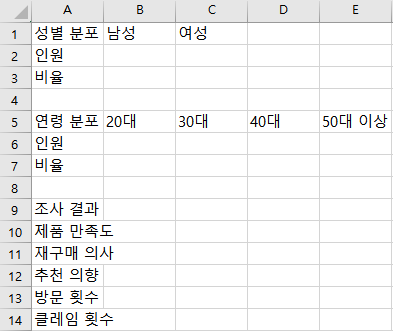

In [11]:
# 남/녀 인원수와 비율
for gender in [["B", "남"], ["C", "여"]]:
    ws[gender[0]+"2"] = "=COUNTIF(Sheet1!H2:H{}, \"{}\")".format(ws.max_row, gender[1])
    ws[gender[0]+"3"] = "={}2/SUM(B2:C2)".format(gender[0])
    ws[gender[0]+"3"].number_format = "0.00%"

# 연령대별 인원수와 비율 
for age in [["B", "20대"], ["C", "30대"], ["D", "40대"], ["E", "50대 이상"]]:
    ws[age[0]+"6"] = "=COUNTIF(Sheet1!G2:G{}, \"{}\")".format(ws.max_row, age[1])
    ws[age[0]+"7"] = "={}6/SUM(B6:E6)".format(age[0])
    ws[age[0]+"7"].number_format = "0.00%"

# 항목별 평균, 합계 요약
row_no = 10
for alphabet in ["B", "C", "D", "E", "F"]:
    ws["B"+str(row_no)] = "=Sheet1!{}{}".format(alphabet, ws.max_row+1) # =Sheet1!B15, =Sheet1!C15, ...
    if row_no < 13:
        ws["B"+str(row_no)].number_format = "#.##"
    row_no += 1

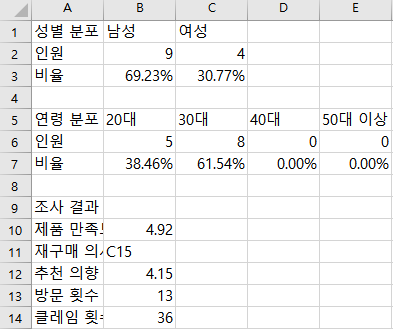

In [13]:
# 05. 서식 설정하기
ws.column_dimensions["A"].width = 15            # A열의 너비는 15로 설정
for alphabet in ["B", "C", "D", "E"]:
    ws.column_dimensions[alphabet].width = 10   # 나머지 열의 너비는 10으로 설정

for i in range(len(summary_table_form)+1):     # 모든 행의 높이를 25로 설정
    ws.row_dimensions[i].height = 25

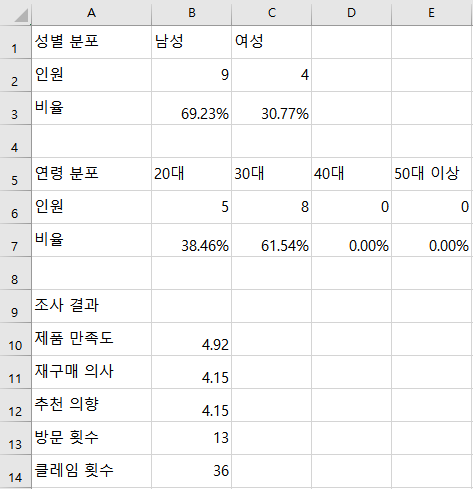

In [15]:
from openpyxl.styles import Alignment, Side, Border, Font, PatternFill, Color

alignment_style = Alignment(horizontal= "center", vertical = "center") # 텍스트 정렬 서식 지정
side = Side(color="CCCCCC", border_style="medium")  # 테두리 서식 지정
border_style = Border(                              # border_style 객체 생성
    left = side,
    right = side,
    top = side,
    bottom = side,
)

# 표가 있는 부분에만 폰트와 테두리 서식 적용
style_apply_cells = ["A1:C3", "A5:E7", "A9:B14"] 
for cell_area in style_apply_cells:                 # 셀 영역을 차례로 읽어 옴
    for row in ws[cell_area]:                       # 셀 영역의 각 행을 차례로 읽어 옴
        for cell in row:                            # 행의 각 셀에 접근
            cell.alignment = alignment_style        # 텍스트 서식 설정
            cell.border = border_style              # 테두리 서식 설정

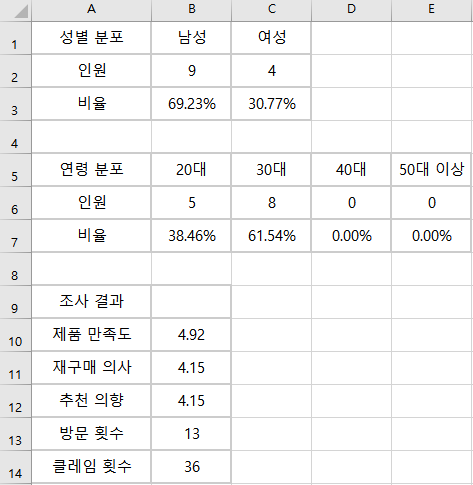

In [17]:
header_font_style = Font(sz = 12, bold = True)     # 표의 헤더 부분은 볼드로 처리
header_background_style = PatternFill(fill_type = "solid", start_color = "ffd663") # 음영 처리
style_apply_cells_for_header = ["A1:C1", "A5:E5", "A9:B9"] # 서식이 적용될 헤더 부분의 영역 설정

for cell_area in style_apply_cells_for_header:     # 셀 영역을 차례로 읽어 옴
    for row in ws[cell_area]:                      # 셀 영역의 각 행을 차례로 읽어 옴
        for cell in row:                           # 행의 각 셀에 접근
            cell.font = header_font_style           # 셀 폰트 서식 설정
            cell.fill = header_background_style     # 셀 배경 서식 설정

ws.merge_cells("A9:B9")                             # ’조사 결과’ 셀 병합

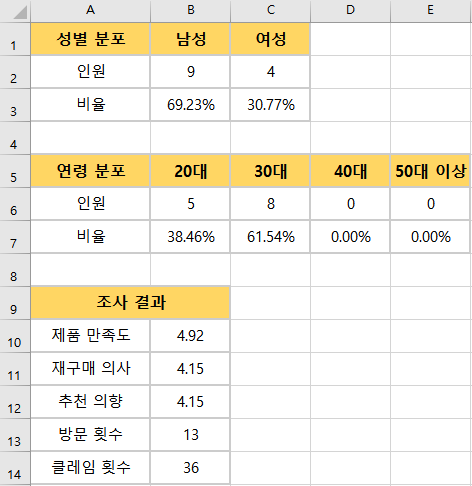

In [19]:
wb.active = ws
wb.save("고객 만족 데이터_보고.xlsx")

### [실습] 여러 개의 엑셀 파일을 하나로 합치기

In [20]:
# 01. 모듈 불러오기
from copy import copy                      # 셀의 값과 서식을 복사하기 위해 copy 모듈 불러오기
from openpyxl import Workbook
from openpyxl import load_workbook

In [22]:
# 02. 사용자 함수 정의하기
def copy_ws(ws_src, wb_dst, new_sheet_name):  
    wb_dst.create_sheet(new_sheet_name)            # 통합 엑셀 파일에 워크시트 하나를 추가
    new_sheet = wb_dst[new_sheet_name]             # 통합 엑셀 파일에 추가한 워크시트를 선택
    for row in ws_src:                            # ws의 행을 하나씩 읽어 옴
        for cell in row:                          # 행의 각 셀에 접근
            new_cell = new_sheet[cell.coordinate] # 접근한 셀의 좌표를 new_cell 변수에 저장
            
          # 현재 접근한 셀의 내용과 서식을 복사하여 통합 파일의 new_sheet 셀에 붙여넣기
            new_cell.value = cell.value                         # 셀 값
            new_cell.font = copy(cell.font)                     # 폰트
            new_cell.border = copy(cell.border)                 # 테두리
            new_cell.fill = copy(cell.fill)                     # 배경
            new_cell.number_format = copy(cell.number_format)   # 셀 값 포멧
            new_cell.protection = copy(cell.protection)         # 보호셀 
            new_cell.alignment = copy(cell.alignment)           # 정렬
    
    if ws_src.merged_cells:    #원본 워크시트에 병합된 셀이 있다면 대상 워크시트에도 반영
        new_sheet.merge_cells(str(ws_src.merged_cells))

In [ ]:
# 03. 통합 실행하기
wb_dst = Workbook()           # 엑셀 파일을 통합할 워크북(통합 파일) 생성
src_file_list = ["시트복사_원본1.xlsx", "시트복사_원본2.xlsx"]   #원본 파일들을 리스트로 생성

for src_file in src_file_list:                 # 반복문을 통해 원본 파일들에 접근
    wb_src = load_workbook(src_file)            # 원본 파일의 워크북을 객체로 로드
    for ws_src in wb_src.worksheets:            # 반복문을 통해 원본 파일의 워크시트에 접근
        new_sheet_name = src_file.split(".xlsx")[0] + "_" + ws_src.title    # 통합 파일 시트명 생성
        copy_ws(ws_src, wb_dst, new_sheet_name)  # 통합 파일에 원본시트 복사

wb_dst.remove(wb_dst["Sheet"])                   # 통합 워크북 객체 생성 시 자동 생성되는 워크시트는 삭제
wb_dst.save("통합.xlsx")                         # 병합이 끝난 대상 워크북 객체를 엑셀 파일로 저장

# "통합.xlsx" 파일을 열어보면 다음과 같이 두 개의 시트 결과를 확인할 수 있습니다. 

## 7.2  파워포인트 업무 자동화

### python-pptx 개요

- 파워포인트 파일(pptx)의 읽기/쓰기 완벽 지원
- 슬라이드 추가 및 삭제, 글상자, 이미지, 표, 도형 등 개체 추가 및 조정
- ppl 그래프(차트) 추가
- 파워포인트에서 사용하는 기능 대부분 지원

In [ ]:
!pip install python-pptx

### 파워포인트 파일 다루기

In [25]:
# 파워포인트 파일 생성하고 저장하기
from pptx import Presentation    # Presentation 클래스 불러오기

In [26]:
prs = Presentation()              # 파워포인트 객체 생성
prs.save ("샘플.pptx")            # 파워포인트 파일로 저장

In [27]:
# 파워포인트 파일 구조 파악하기
from pptx import Presentation                     
prs = Presentation("./file/사내 어린이집 원아모집.pptx")  # 파일을 불러와 파워포인트 객체 생성

slide1 = prs.slides[0]                             # prs 객체의 0번 슬라이드를 slide1에 저장
for shape in slide1.shapes:                       # slide1.shapes를 하나씩 불러오기
    print(shape.shape_type)

AUTO_SHAPE (1)
PICTURE (13)
TEXT_BOX (17)
AUTO_SHAPE (1)
TABLE (19)
AUTO_SHAPE (1)
AUTO_SHAPE (1)
AUTO_SHAPE (1)
AUTO_SHAPE (1)
AUTO_SHAPE (1)
GROUP (6)
GROUP (6)
AUTO_SHAPE (1)
AUTO_SHAPE (1)
AUTO_SHAPE (1)
AUTO_SHAPE (1)
AUTO_SHAPE (1)


In [29]:
# 도형과 글상자에 있는 텍스트 출력하기
from pptx import Presentation                   
prs = Presentation("./file/사내 어린이집 원아모집.pptx")

slide1 = prs.slides[0]                      # prs 객체의 0번 슬라이드를 slide1에 저장
for shape in slide1.shapes:                 # slide1.shapes를 하나씩 불러오기
    if shape.shape_type == 1 or shape.shape_type == 17:   # shape_type이 1 또는 17일 경우
        print(shape.text)                    # 텍스트 출력

사내 어린이집 원아모집 (안내)
직장 어린이집 원아모집 관련 내용을 안내드리오니
자녀분의 입소를 희망하시는 직원분께서는 신청해주시기 바랍니다.
1. 모집 대상 : 만 1세 ~ 만 5세의 영유아가 있는 직원
- 연령별 원아모집 결과에 따라 반별 인원은 조정 가능, 결원 시 수시모집
 
2. 모집 인원 (변동 가능)
3. 신청방법 

바른
어린이집
신청 : 어린이집 홈페이지 신청
서류 제출 : 직접 우편접수 (첨부1 서류목록 및 제출처 주소지 참조)
접수 일정 : ~11.6(금) 18시까지 온라인 접수  *20.11.13(금) 오후 2시 발표 예정
신청 : 어린이집 홈페이지 신청
서류 제출 : 이메일 제출* 메일 제목 : 신청자 이름/아동 이름(생년월일)/서류제출명
접수 일정 : ~11.6(금) 18시까지 온라인 접수  *20.11.13(금) 오후 2시 발표 예정
신청 : 담당자 이메일 신청* 자녀 성명/생년/모집구분 기재 必 (가족관계증명서 必)
접수 일정 : ~11.6(금) 18시까지 메일 접수 *20.11.13(금) 오후 2시 발표 예정
※ 첨부 : 어린이집 제출서류 상세 (안내)
【마침】


In [31]:
# 텍스트 수정하기
from pptx import Presentation
prs = Presentation("./file/사내 어린이집 원아모집.pptx") 

slide1 = prs.slides[0]                       # prs 객체의 0번 슬라이드를 slide1에 저장
for shape in slide1.shapes:                  # slide1.shapes를 하나씩 불러오기

    # 제목 도형인지 체크하기 위한 필터링
    if shape.shape_type == 1 and "원아모집 (안내)" in shape.text: 
        shape.text = "어린이집 모집안내"      # 해당 도형의 텍스트 값 변경
prs.save("./file/사내 어린이집 원아모집_수정.pptx")  # 다른 파워포인트 파일로 저장

In [33]:
# 텍스트 서식 변경하기
from pptx import Presentation
from pptx.util import Pt                # 폰트 크기 설정을 위해 로드(Pt : point를 의미)
from pptx.dml.color import RGBColor     # 색 설정을 위해 로드 
from pptx.enum.text import PP_ALIGN     # 텍스트 정렬을 위해 로드 

prs = Presentation("./file/사내 어린이집 원아모집.pptx")  
slide1 = prs.slides[0]                   # prs 객체의 0번 슬라이드를 slide1에 저장
for shape in slide1.shapes:              # slide1.shapes를 하나씩 불러오기

    # 제목 도형인지 체크한 후 텍스트 내용과 서식 수정
    if shape.shape_type == 1 and "원아모집 (안내)" in shape.text: 
        shape.text = "어린이집 모집안내"                              # 해당 도형의 텍스트 값 변경
        shape.text_frame.paragraphs[0].alignment = PP_ALIGN.CENTER    # 중앙 정렬
        shape.text_frame.paragraphs[0].font.bold = True               # 볼드체로 설정
        shape.text_frame.paragraphs[0].font.name = "맑은 고딕"        # 맑은 고딕 서체로 설정
        shape.text_frame.paragraphs[0].font.size = Pt(20)             # 폰트 크기 20으로 설정
        shape.text_frame.paragraphs[0].font.color.rgb = RGBColor(0xFF, 0xFF, 0xFF)  # 흰색으로 설정
prs.save("./file/사내 어린이집 원아모집_서식수정.pptx")  # 파일 저장

In [34]:
# 표 내용 불러오고 수정하기
from pptx import Presentation
prs = Presentation("./file/사내 어린이집 원아모집.pptx")
slide1 = prs.slides[0]            # prs 객체의 0번 슬라이드를 slide1에 저장

for shape in slide1.shapes:                                    # slide1.shapes를 하나씩 불러오기
    if shape.has_table:                                        # 표만 따로 필터링하기. has_table 멤버변수로 표인지 체크 가능
        print(shape.table.cell(row_idx = 0, col_idx = 0).text) # 출력값: 모집구분. 0번 행, 0번 열
        print(shape.table.cell(0, 1).text)                     # 출력값: 생년월일, 0번 행, 1번 열
        for cell in shape.table.iter_cells():                 # 반복문을 통해 순차적으로 접근(행 → 열 순)
            print(cell.text)

모집구분
생년월일
모집구분
생년월일
바른어린이집
곧은어린이집
희망어린이집
만 1세반
‘19.1.1 ~ ‘19.12.31
16
18
20
만 2세반
‘18.1.1 ~ ‘18.12.31
18
18
15
만 3세반
‘17.1.1 ~ ‘17.12.31
15
22
19
만 4세반
‘16.1.1 ~ ‘16.12.31
15
12
14
만 5세반
’15.1.1 ~ ’15.12.31
15
12
13
計

79
82
81


In [35]:
# 표 내용 불러오고 수정하기
from pptx import Presentation
from pptx.util import Pt                # 폰트 크기 설정을 위해 로드(Pt : point를 의미)
from pptx.enum.text import PP_ALIGN     # 텍스트 정렬을 위해 로드 
prs = Presentation("./file/사내 어린이집 원아모집.pptx") 

# 바꿀 내용을 리스트로 먼저 저장. 왼쪽은 원본, 오른쪽은 바뀔 내용
replace_text = [
    ["바른어린이집", "좋은어린이집"],
    ["곧은어린이집", "멋진어린이집"],
    ["희망어린이집", "밝은어린이집"]]

slide1 = prs.slides[0]                   # prs 객체의 0번 슬라이드를 slide1에 저장
for shape in slide1.shapes:             # slide1.shapes를 하나씩 불러오기
    if shape.has_table:                 # 표만 따로 필터링하기. has_table 멤버변수로 표인지 체크 
        for cell in shape.table.iter_cells(): # 반복문을 통해 순차적으로 접근(행 → 열 순)
            for re_text in replace_text:
                if cell.text == re_text[0]:  # 바뀔 내용과 동일한 텍스트일 경우
                    cell.text = re_text[1]   # 내용 변경
                    # 셀 내용을 수정하면 서식이 변경되므로 재조정
                    cell.text_frame.paragraphs[0].alignment = PP_ALIGN.CENTER 
                    cell.text_frame.paragraphs[0].font.name = "맑은 고딕"
                    cell.text_frame.paragraphs[0].font.bold = True
                    cell.text_frame.paragraphs[0].font.size = Pt(11)
                    break
prs.save("./file/사내 어린이집 원아모집_표 내용 수정.pptx")  # 다른 파워포인트 파일로 저장

### [실습] 행사 참가자 명찰 제작하기

In [1]:
# 01. 작업 파일 불러오기
import pandas as pd                    # pandas 모듈 불러오기
from pptx import Presentation          # Presentation 모듈 불러오기

df = pd.read_excel("./file/행사 참석자 명단.xlsx")  # 참석자 명단 불러와 df에 저장
prs = Presentation("./file/명찰 양식.pptx")         # 명찰 양식 불러와 prs 객체 생성

In [2]:
# 02. 사용자 함수 정의
import copy

def duplicate_slide(prs, org_slide):
    # add_slide() 메소드를 이용해 새로운 슬라이드 생성한 후 개체를 복사해 옴
    copied_slide = prs.slides.add_slide(org_slide.slide_layout)
    for shape in org_slide.shapes:
        org_elment = shape.element
        new_element = copy.deepcopy(org_elment)
        copied_slide.shapes._spTree.insert_element_before(new_element, "p:extLst")
    
    for value in org_slide.part.rels:
        if "notesSlide" not in value.reltype:
            copied_slide.part.rels.get_or_add(
                value.reltype,
                value._target
            )
    return copied_slide

In [ ]:
# 03. 명찰 제작하기
from pptx.util import Pt           # 폰트 크기 조정을 위해 로드
nametag_count = 0
for person_count in range(len(df)): # 참석자 수(32명)만큼 반복문 실행
    # 슬라이드 1장 당 4개의 명찰이 있으므로
    # 현재 반복문이 실행되고 있는 person_count를 4로 나누고
    # 남은 값이 0일 때(=4의 배수일 때) 슬라이드를 복사하고 데이터를 입력함
    if person_count % 4 == 0:
        new_slide = duplicate_slide(prs, prs.slides[0]) # 첫 번째 슬라이드를 복사하여 추가
        for shape in new_slide.shapes:                  # 슬라이드에 있는 개체를 체크하여 데이터 입력
            # 명찰 입력이 완료된 개수(nametag_count)가
            # 명단 데이터 개수(len(df))보다 적을 때만 실행
            if nametag_count < len(df):
                if shape.shape_type == 17 and shape.text == "소속":
                    shape.text_frame.paragraphs[0].text = df.iloc[nametag_count, 1]
                    shape.text_frame.paragraphs[0].font.size = Pt(24)
                    shape.text_frame.paragraphs[0].font.bold = True
                    shape.text_frame.paragraphs[0].font.name = "맑은 고딕"
                elif shape.shape_type == 17 and shape.text == "이름":
                    shape.text_frame.paragraphs[0].text = df.iloc[nametag_count, 0]
                    shape.text_frame.paragraphs[0].font.size = Pt(60)
                    shape.text_frame.paragraphs[0].font.bold = True
                    shape.text_frame.paragraphs[0].font.name = "맑은 고딕"
                    # 이름 입력까지 완료되면 입력 완료된 개수(nametag_count) 업데이트
                    nametag_count += 1
prs.save("./file/명찰 자동제작 결과.pptx") #새로운 파일로 저장

## 7.3 시스템 제어하기

### pyautogui 개요

- 마우스를 이동하고 다른 응용 프로그램의 창을 클릭
- 응용 프로그램에 키보드로 내용 입력
- 스크린 샷을 찍고 이미지가 주어지면 화면에서 탐색(예: 버튼 또는 확인란)
- 응용 프로그램의 창을 찾아 이동, 크기 조정, 최대화, 최소화 또는 닫기
- GUI 자동화 스크립트가 실행되는 동안 사용자 상호작용을 위한 메시지 상자 표시

In [ ]:
!pip install pyautogui

In [46]:
import pyautogui

### 마우스 제어하기

In [47]:
pyautogui.size()             # 모니터 해상도

Size(width=1920, height=1080)

In [28]:
pyautogui.position()         # 현재 마우스 커서 X 및 Y 좌표 반환

Point(x=1309, y=944)

In [51]:
import pyautogui            # pyautogui 패키지 로드
import time                 # time 패키지 로드
time.sleep(3)                # 3초 동안 대기(원하는 위치로 마우스를 이동)
pyautogui.position()         # 마우스 포지션 반환

Point(x=440, y=693)

In [52]:
pyautogui.moveTo(100, 200)  # 마우스 커서가 X, Y 좌표(100, 200)로 이동

In [53]:
pyautogui.moveTo(100, 400, 3)  # 마우스 커서가 X, Y 좌표(100, 400)로 3초 동안 이동

In [54]:
pyautogui.move(0, 200)          # 현재 위치에서 아래로(Y 좌표만) 200 이동
pyautogui.move(100, 200)        # 현재 위치에서 우측으로(X 좌표) 100, 아래로(Y 좌표) 200 이동
pyautogui.move(100, 200, 3)     # 현재 위치에서 우측으로 100, 아래로 200, 3초 동안 이동

In [55]:
pyautogui.dragTo(500, 500, button = "left")      # 현재 위치에서 X, Y(500, 500) 좌표로 드래그
pyautogui.dragTo(300, 300, 2, button = "left")   # 현재 위치에서 X, Y(300, 300) 좌표로 2초 동안 드래그
pyautogui.drag(100, 0, 2, button = "left")       # 현재 위치에서 우측으로 100, 2초 동안 드래그

In [57]:
pyautogui.click()

In [58]:
pyautogui.click(x = 100, y = 200)        # X, Y(100, 200) 좌표를 클릭

In [59]:
pyautogui.click(button = "right")        # 마우스 오른쪽 버튼 클릭

In [60]:
pyautogui.click(clicks = 2)                     # 2번 클릭하는 것으로 더블클릭과 동일
pyautogui.click(clicks = 2, interval = 0.25)    # 더블 클릭을 하되 클릭 사이에 0.25초 간격 지정
pyautogui.click(button = "right", clicks = 3, interval = 0.25)  # 마우스 오른쪽 버튼을 0.25초 간격으로 3번 클릭

In [61]:
pyautogui.doubleClick()             # 더블 클릭 전용 함수
pyautogui.tripleClick()             # 트리플 클릭 전용 함수

In [62]:
pyautogui.mouseDown()                                  # 현재 위치에서 마우스 왼쪽 버튼 누르기
pyautogui.mouseUp()                                    # 현재 위치에서 눌러진 마우스 왼쪽 버튼 놓기
pyautogui.mouseDown(button = "right")                  # 현재 위치에서 마우스 오른쪽 버튼 누르기
pyautogui.mouseUp(button = "right", x = 200, y = 300)  # 지정 좌표에서 마우스 오른쪽 버튼 누르기

In [63]:
pyautogui.scroll(10)                    # 10만큼 위로 스크롤
pyautogui.scroll(-15)                   # 15만큼 아래로 스크롤
pyautogui.scroll(10, x = 200, y = 200)  # X, Y(200, 200) 좌표에서 10만큼 위로 스크롤

### 키보드 제어하기

In [72]:
pyautogui.write("Hello")
pyautogui.write("Good morning", interval = 0.5)  # 0.25초의 간격을 두고 각 단어를 입력 

In [76]:
pyautogui.keyDown("shift")  # shift 키를 누름
pyautogui.write("12abc;", interval = 0.5)
pyautogui.keyUp("shift")    # 누른 shift 키를 뗌    result=!@ABC:

In [74]:
pyautogui.press("shift")    # shift 키를 누름(눌렀다가 뗌)

In [75]:
pyautogui.keyDown("shift")  # shift 키를 누르고 있음
pyautogui.press("left")     # 왼쪽 화살표 키를 한 번 눌렀다가 뗌
pyautogui.press("left")     # 왼쪽 화살표 키를 한 번 눌렀다가 뗌
pyautogui.press("left")     # 왼쪽 화살표 키를 한 번 눌렀다가 뗌
pyautogui.keyUp("shift")    # 누르고 있던 shift 키를 뗌

In [77]:
pyautogui.press(["left", "left", "left"])   # 왼쪽 화살표 키를 세 번 눌렀다가 뗌

In [81]:
pyautogui.hotkey("ctrl", "c")       # Ctrl + C 키를 입력

In [82]:
pyautogui.keyDown("ctrl")       # Ctrl 키를 누르고 있음
pyautogui.press("c")            # C 키를 한 번 눌렀다가 뗌
pyautogui.keyUp("ctrl")         # 누르고 있던 Ctrl 키를 뗌

### 메시지 박스

In [84]:
pyautogui.alert(text = "alert 함수입니다.", title = "alert 함수", button = "OK")
# [확인]을 클릭하면 "OK"가 출력됨

'OK'

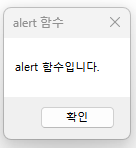

In [85]:
pyautogui.confirm(text = "confirm 함수입니다.", title = "confirm 함수", buttons = ["OK", "Cancel"])
# [확인]을 클릭하면 "OK"가, [취소]를 클릭하면 "Cancel"이 출력됨

'Cancel'

In [86]:
pyautogui.prompt(text = "prompt 함수입니다.", title = "prompt 함수", default = "ID")
# 텍스트를 입력하면 입력한 텍스트를 반환함

'ID'

In [88]:
pyautogui.password(text = "패스워드를 입력하세요.", title = "로그인", mask = "*")
# 패스워드 입력 후 [OK]를 클릭하면 입력한 텍스트를 반환함

'PASSWORD~'

### 스크린 샷 

In [ ]:
!pip install pillow

In [4]:
from PIL import Image

In [7]:
image1 = pyautogui.screenshot()     # 전체 화면을 캡처하여 image1에 저장
print(image1)                       # 이미지 정보 출력

<PIL.Image.Image image mode=RGB size=1920x1080 at 0x22499512D08>


In [8]:
image2 = pyautogui.screenshot("screenshot.png")
# 전체 화면을 캡처하여 현재 폴더에 "screenshot.png" 파일로 저장

In [11]:
image3 = pyautogui.screenshot(region=(0, 0, 300, 400))  # region= (x, y, width, height)
print(image3)                                           # 이미지 정보 출력

<PIL.Image.Image image mode=RGB size=300x400 at 0x2249D9F4288>


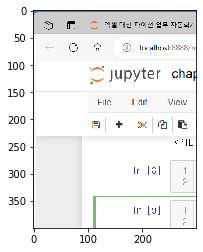

In [12]:
import matplotlib.pyplot as plt         # matplotlib 패키지 불러오기
plt.imshow(image3)                       # plt.imshow() 함수로 이미지 출력하기

### [실습] 네이버 날씨 연속으로 자동 캡처 하기

In [34]:
# 패키지 불러오기
import pyautogui         # pyautogui 패키지 불러오기
import time              # time 패키지 불러오기
import datetime          # datetime 패키지 불러오기

# 캡처 횟수 입력 받기
str_cap_num = pyautogui.prompt(text = "몇 번 캡처할지 입력해 주세요", title = "캡처 횟수", default = "")
int_cap_num = int(str_cap_num)      # 변수 int_cap_num에 캡처 횟수 저장

# 캡처 횟수 반복문 설정하기
i = 0                            # 반복문 카운터로 사용할 변수 초기화
while i < int_cap_num:          # 사용자로부터 입력받은 캡처 횟수만큼 반복
    i = i + 1                   # 카운터 1씩 증가

# 캡처 도구 실행하기
    pyautogui.hotkey("win", "s")     # 핫키 Win + S 실행
    time.sleep(1.5)                  # 1.5초 지연
    pyautogui.write("snippingtool")  # 이미지 캡처 도구를 실행하기 위해 입력
    pyautogui.press("enter")         # Enter 키 입력
    time.sleep(2)                    # 2초 지연

# 캡처 버튼 실행하기
    pyautogui.hotkey("alt", "n")
    time.sleep(3)

# 날씨 영역 캡처하기
    pyautogui.moveTo(960, 750)     # 마우스 커서를 좌표(960, 750)로 이동
    time.sleep(3) 
    pyautogui.dragTo(1300, 950, duration = 2, button = "left") # 현재 위치에서 좌표(1300, 950)까지 마우스로 드래그
    time.sleep(1)                   # 1초 지연

# 현재 일시를 활용한 파일 이름 지정하기    
    now_date = datetime.datetime.now().strftime("%y%m%d_%H%M%S")
    time.sleep(3) 
    file_name = "weather_" + now_date + ".png"     # 파일 이름 설정

# 캡처 이미지 저장하기    
    pyautogui.hotkey("ctrl", "s")   # 저장하기(Ctrl + S) 실행
    time.sleep(1)                   # 1초 지연
    pyautogui.write(file_name)      # file_name의 값을 화면에 입력
    pyautogui.hotkey("alt", "s")    # 저장하기(Alt + S) 실행
    time.sleep(1)                   # 1초 지연

# 캡처 도구 닫기
    pyautogui.hotkey("alt", "F")    # 파일 열기(Alt + F) 실행
    time.sleep(1)                   # 1초 지연
    pyautogui.press("x")            # 끝내기(x) 실행
    time.sleep(5)                   # 5초 지연

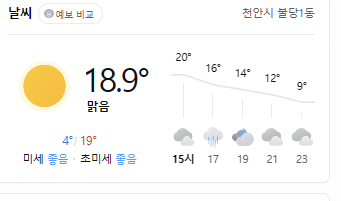

### [실습] 성적 처리 자동화

In [45]:
# 패키지 불러오기
import pyautogui                # pyautogui 패키지 불러오기
import time                     # time 패키지 불러오기
import clipboard                # 클립보드 패키지 불러오기

# 예제 파일 불러오기
time.sleep(1)
pyautogui.hotkey("win", "r")                 # 윈도우의 실행 메뉴 단축키 입력
time.sleep(0.5)
pyautogui.write("C:/Users/PPP/엑셀 대신 파이선 업무 자동화/file/score.xlsx")       # 경로를 포함한 파일 이름 지정
pyautogui.press("enter")
pyautogui.sleep(5)


# 총점과 평균 제목 입력하기
pyautogui.hotkey("ctrl", "home")                                # [A1] 셀로 위치 변경
pyautogui.press("right", presses = 4, interval = 0.1)           # 현재 위치에서 오른쪽으로 4칸 이동
clipboard.copy("총점\t평균")                                    # 입력할 내용을 클립보드에 복사
time.sleep(1)
pyautogui.hotkey("ctrl", "v")                                   # 제목 복사
time.sleep(1)

# 총점 및 평균 계산하기
time.sleep(1)
pyautogui.press("down")                                         # [E1] 셀에서 [E2] 셀로 이동

for i in range(10):
    pyautogui.write(f"=sum(B{2+i}:D{2+i})", interval=0.1)       # 총점 계산식 입력
    pyautogui.press("right")
    pyautogui.write(f"=average(B{2+i}:D{2+i})", interval=0.1)   # 평균 계산식 입력
    pyautogui.press(["enter", "left"]) 

# 셀 정렬하기  
pyautogui.hotkey("ctrl", "g")               # 엑셀의 이동 메뉴 실행
pyautogui.typewrite("a1", interval=0.1)     # [A1] 셀에 입력
pyautogui.press("enter")
time.sleep(0.5)
pyautogui.hotkey("ctrl", "a")               # 범위 지정 단축키 입력
time.sleep(0.5)
pyautogui.hotkey("alt", "h")                # [홈] 탭 실행
pyautogui.typewrite("c")                    # 가운데 맞춤 실행(엑셀 2016 버전)
pyautogui.typewrite("2")

# 엑셀 2013, 2019 이후 버전에서는 가운데 맞춤 단축키가 a, c이므로
# pyautogui.typewrite("a"), pyautogui.typewrite("c") 코드를 사용하기 바랍니다.

# 표 만들기
time.sleep(0.5)
pyautogui.hotkey("ctrl", "t")               # 표 만들기 메뉴 실행
pyautogui.press("enter")                    # 표 만들기 확인

# 총점 순으로 정렬하기
pyautogui.hotkey("ctrl", "g")               # 엑셀의 이동 메뉴 실행
pyautogui.typewrite("e1", interval=0.1)     # [E1] 셀에 입력
pyautogui.press("enter")                    # 확인 입력
pyautogui.hotkey("alt", "a")                # 정렬 단축키 실행
pyautogui.press("s")                        # 내림차순 단축키 입력
pyautogui.press("d")

# 저장 및 닫기
time.sleep(1)
pyautogui.hotkey("alt", "f2")               # 파일 저장 메뉴 불러오기
pyautogui.typewrite("score_result.xlsx", interval=0.1)     # 현재 위치에 "score_result.xlsx"로 저장
pyautogui.press("enter")
pyautogui.hotkey("alt", "f4")               # 엑셀 종료